In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
size = 1500
lats = np.random.uniform(low=-90.000, high=90.000, size=size)
lngs = np.random.uniform(low=-180.000, high=180.000, size=size)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
#for i in range(len(cities)):
#    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
#        time.sleep(60)
    # Create endpoint URL with each city.
#    city_url = url + "&q=" + cities[i]

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | christchurch
Processing Record 4 of Set 1 | pangnirtung
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | torbay
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | lucea
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | kaitangata
Processing Record 15 of Set 1 | hervey bay
Processing Record 16 of Set 1 | esperance
Processing Record 17 of Set 1 | celestun
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | margate
Processing Record 20 of Set 1 | yulara
Processing Record 21 of Set 1 | kyzyl-suu
Processing Record 22 of Set 1 | pisco
Processing Record 23 of Set 1 | abrau-dyurso

Processing Record 39 of Set 4 | isangel
Processing Record 40 of Set 4 | nizwa
Processing Record 41 of Set 4 | mokhotlong
Processing Record 42 of Set 4 | bonavista
Processing Record 43 of Set 4 | abha
Processing Record 44 of Set 4 | atasu
Processing Record 45 of Set 4 | tarnogskiy gorodok
Processing Record 46 of Set 4 | catio
Processing Record 47 of Set 4 | xichang
Processing Record 48 of Set 4 | katobu
Processing Record 49 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 50 of Set 4 | salamiyah
Processing Record 1 of Set 5 | tabou
Processing Record 2 of Set 5 | oum hadjer
Processing Record 3 of Set 5 | sinnamary
Processing Record 4 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 5 | naze
Processing Record 6 of Set 5 | burgeo
Processing Record 7 of Set 5 | kusk
City not found. Skipping...
Processing Record 8 of Set 5 | jalu
Processing Record 9 of Set 5 | mao
Processing Record 10 of Set 5 | provideniya
Processing Record 11 of Set 5 | quesne

Processing Record 28 of Set 8 | manta
Processing Record 29 of Set 8 | norman wells
Processing Record 30 of Set 8 | kurilsk
Processing Record 31 of Set 8 | paamiut
Processing Record 32 of Set 8 | fairbanks
Processing Record 33 of Set 8 | mortka
Processing Record 34 of Set 8 | inirida
Processing Record 35 of Set 8 | san jose
Processing Record 36 of Set 8 | kita
Processing Record 37 of Set 8 | ojinaga
Processing Record 38 of Set 8 | baruun-urt
Processing Record 39 of Set 8 | namatanai
Processing Record 40 of Set 8 | glubokoe
City not found. Skipping...
Processing Record 41 of Set 8 | sur
Processing Record 42 of Set 8 | hulan
Processing Record 43 of Set 8 | vanimo
Processing Record 44 of Set 8 | mairang
Processing Record 45 of Set 8 | palmas
Processing Record 46 of Set 8 | constitucion
Processing Record 47 of Set 8 | vaitape
Processing Record 48 of Set 8 | saquena
Processing Record 49 of Set 8 | tezu
Processing Record 50 of Set 8 | tautira
Processing Record 1 of Set 9 | shagonar
Processing

Processing Record 19 of Set 12 | xuddur
Processing Record 20 of Set 12 | soyo
Processing Record 21 of Set 12 | santa rosa
Processing Record 22 of Set 12 | labuhan
Processing Record 23 of Set 12 | conde
Processing Record 24 of Set 12 | poum
Processing Record 25 of Set 12 | yar-sale
Processing Record 26 of Set 12 | kuryk
Processing Record 27 of Set 12 | pauini
Processing Record 28 of Set 12 | kamenka
Processing Record 29 of Set 12 | vostok
Processing Record 30 of Set 12 | vrangel
Processing Record 31 of Set 12 | veraval
Processing Record 32 of Set 12 | sagua de tanamo
Processing Record 33 of Set 12 | rio gallegos
Processing Record 34 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 35 of Set 12 | zunyi
Processing Record 36 of Set 12 | mbuguni
Processing Record 37 of Set 12 | marakkanam
Processing Record 38 of Set 12 | valparaiso
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,41.11,75,75,19.57,CL,2022-06-04 05:33:20
1,Qaanaaq,77.4840,-69.3632,22.01,84,97,6.76,GL,2022-06-04 05:33:20
2,Christchurch,-43.5333,172.6333,50.92,73,1,11.50,NZ,2022-06-04 05:29:19
3,Pangnirtung,66.1451,-65.7125,37.40,81,20,3.44,CA,2022-06-04 05:33:21
4,Ushuaia,-54.8000,-68.3000,40.66,60,75,9.22,AR,2022-06-04 05:33:21
5,Dikson,73.5069,80.5464,28.56,74,19,16.49,RU,2022-06-04 05:33:21
6,Hithadhoo,-0.6000,73.0833,83.80,70,99,8.03,MV,2022-06-04 05:33:22
7,Torbay,47.6666,-52.7314,40.57,90,75,10.36,CA,2022-06-04 05:33:22
8,Atuona,-9.8000,-139.0333,77.72,78,15,19.93,PF,2022-06-04 05:30:24
9,Bluff,-46.6000,168.3333,47.80,76,94,6.04,NZ,2022-06-04 05:33:22


In [12]:
# Reorder columns
city_data_df = city_data_df[["City", "Country", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,-53.1500,-70.9167,41.11,75,75,19.57
1,Qaanaaq,GL,77.4840,-69.3632,22.01,84,97,6.76
2,Christchurch,NZ,-43.5333,172.6333,50.92,73,1,11.50
3,Pangnirtung,CA,66.1451,-65.7125,37.40,81,20,3.44
4,Ushuaia,AR,-54.8000,-68.3000,40.66,60,75,9.22
5,Dikson,RU,73.5069,80.5464,28.56,74,19,16.49
6,Hithadhoo,MV,-0.6000,73.0833,83.80,70,99,8.03
7,Torbay,CA,47.6666,-52.7314,40.57,90,75,10.36
8,Atuona,PF,-9.8000,-139.0333,77.72,78,15,19.93
9,Bluff,NZ,-46.6000,168.3333,47.80,76,94,6.04


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1654321650.9631295

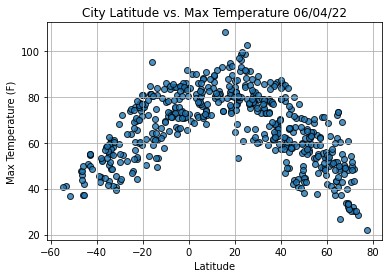

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,-53.1500,-70.9167,41.11,75,75,19.57
1,Qaanaaq,GL,77.4840,-69.3632,22.01,84,97,6.76
2,Christchurch,NZ,-43.5333,172.6333,50.92,73,1,11.50
3,Pangnirtung,CA,66.1451,-65.7125,37.40,81,20,3.44
4,Ushuaia,AR,-54.8000,-68.3000,40.66,60,75,9.22
...,...,...,...,...,...,...,...,...
537,Rio Gallegos,AR,-51.6226,-69.2181,36.66,56,100,9.80
538,Zunyi,CN,27.6867,106.9072,83.07,67,57,1.95
539,Mbuguni,TZ,-3.5667,36.9500,66.34,60,24,5.17
540,Marakkanam,IN,12.2000,79.9500,91.63,53,86,7.11
